## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import random
from collections import Counter
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier

## Loading Gutenberg Dataset 1

In [2]:
train_x = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/train_x.npy')
train_y = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/train_y.npy')
test_x = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/test_x.npy')
test_y = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/test_y.npy')
valid_x = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/valid_x.npy')
valid_y = np.load('../dataset_01_gutenberg_dataset_by_newcastle_university/data_before_processing/valid_y.npy')

## EDA of Gutenberg Dataset 1 (Before Preprocessing)

In [3]:
train_x, train_y

(array([[[[1., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 1., 1.]]],
 
 
        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 1., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 1.]]],
 
 
        [[[0., 1., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 1., 1., 1.]]],
 
 
        ...,
 
 
        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 1.],
   

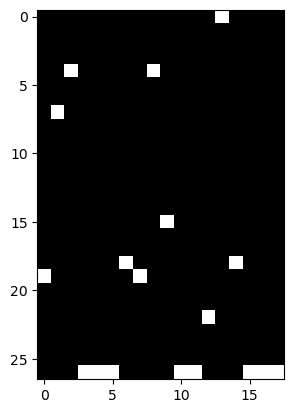

In [4]:
# Generate a random integer between 1 and 45000
random_integer = random.randint(1, 45000)

# Display an image from the training dataset at the index of the random integer
plt.imshow(train_x[random_integer, 0, :, :], cmap='gray')

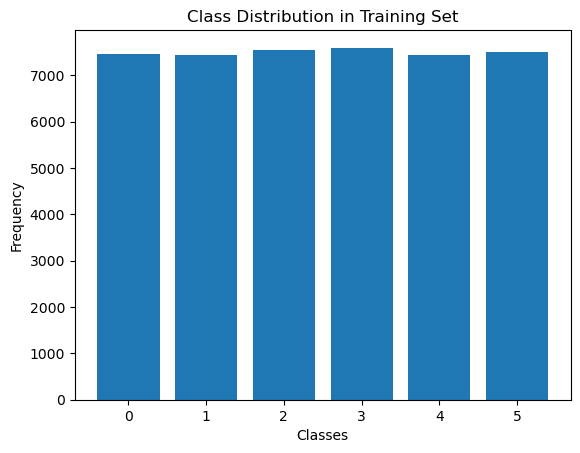

In [5]:
# Calculate the unique classes and their counts in train_y
unique, counts = np.unique(train_y, return_counts=True)

# Create a bar chart to display the frequency of each class
plt.bar(unique, counts)

# Add a title to the chart
plt.title('Class Distribution in Training Set')

# Label the x-axis with 'Classes'
plt.xlabel('Classes')

# Label the y-axis with 'Frequency'
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Gutenberg Dataset 1 Preprocessing (NumPy array to Dataframe)

In [6]:
# Function to decode a single image into its textual representation
def decode_image(encoded_image):
    '''The decode_image function takes an image encoded as an array and decodes it into a string by mapping each encoded character back to a human-readable character ('A'-'Z' and space). '''
    # Create a mapping of numeric indices to characters: A-Z and space
    char_map = {i: chr(65 + i) for i in range(26)}
    char_map[26] = ' '  # Space character mapping
    
    decoded_string = []  # Initialize a list to hold the decoded characters
    for i in range(18):  # Loop over each of the 18 character positions in the image
        # Find the index with the highest value in the i-th column, which indicates the encoded character
        char_index = np.argmax(encoded_image[0, :, i])
        # Map the index to a character using the char_map and append to the list
        decoded_string.append(char_map[char_index])
    
    # Join all characters in the list to form the decoded string and return it
    return ''.join(decoded_string)

# Decode all images in the training set using a list comprehension
decoded_texts = [decode_image(img) for img in train_x]

# Print out the first 10 decoded strings to check the decoding results
for text in decoded_texts[:10]:
    print(text)

ALONE SHE   FLED  
HER   OLD   PLACE 
HAPPY ARE   THE   
ILY   SHE   ADDED 
POWER WHICH DOES  
THEY  ARE   UNCLE 
MUST  RECKONTHE   
LAWS  ABOUT GODS  
YOU   SHOW  HIM   
AND   TSZ   CHAN  


In [7]:
train_df = pd.DataFrame({
    'Text': decoded_texts,  # Column for the decoded texts
    'Label': train_y  # Column for the labels
})

# Define a mapping from numerical labels to author names
label_map = {
    0: 'aquinas',
    1: 'confucius',
    2: 'hawthorne',
    3: 'plato',
    4: 'shakespeare',
    5: 'tolstoy'
}
# Apply the mapping to the 'Label' column to replace numerical labels with author names
train_df['Label'] = train_df['Label'].map(label_map)

# Save the DataFrame with decoded texts and author labels to a CSV file
# df.to_csv('../dataset_01_gutenberg_dataset_by_newcastle_university/data_after_processing/training_data_with_labels.csv', index=False)

In [8]:
train_df

,Text,Label
0,ALONE SHE FLED,hawthorne
1,HER OLD PLACE,hawthorne
2,HAPPY ARE THE,plato
3,ILY SHE ADDED,tolstoy
4,POWER WHICH DOES,aquinas
...,...,...
44995,LESS ANGRY SHALL,plato
44996,FILL THEIR CUPS,confucius
44997,MET FOR NEARLY,tolstoy
44998,HAVE CUT DOWN,confucius


In [9]:
# Read the CSV file into a pandas DataFrame
glutenburg_train = pd.read_csv("../dataset_01_gutenberg_dataset_by_newcastle_university/data_after_processing/training_data_with_labels.csv")

# Display the first five rows of the DataFrame to verify its contents
glutenburg_train.head()

,Text,Label
0,ALONE SHE FLED,hawthorne
1,HER OLD PLACE,hawthorne
2,HAPPY ARE THE,plato
3,ILY SHE ADDED,tolstoy
4,POWER WHICH DOES,aquinas


In [10]:
# Decode the encoded images into text for the test dataset
decoded_texts = [decode_image(img) for img in test_x]

# Construct a DataFrame with the decoded texts and corresponding labels
test_df = pd.DataFrame({
    'Text': decoded_texts,  # The decoded texts
    'Label': test_y  # The corresponding labels
})

# Define a mapping from numerical labels to author names
label_map = {
    0: 'aquinas',
    1: 'confucius',
    2: 'hawthorne',
    3: 'plato',
    4: 'shakespeare',
    5: 'tolstoy'
}

# Replace numerical labels in the DataFrame with author names using the map
test_df['Label'] = test_df['Label'].map(label_map)

# Save the DataFrame with decoded texts and author labels to a CSV file for further analysis
# test_df.to_csv('../dataset_01_gutenberg_dataset_by_newcastle_university/data_after_processing/testing_data_with_labels.csv', index=False)

In [11]:
test_df

,Text,Label
0,AND RANK WOULD,tolstoy
1,BEFOREALL BODIES,plato
2,WHOM THAT AGE,hawthorne
3,AND LIVE AFTER,plato
4,LITTLEFACE UPON,hawthorne
...,...,...
5995,NOR PAN WILL,confucius
5996,MAY FAIRLYTAKE,plato
5997,BALLETLEVIN ONLY,tolstoy
5998,THE FINAL PAS,tolstoy


In [12]:
glutenburg_test= pd.read_csv("../dataset_01_gutenberg_dataset_by_newcastle_university/data_after_processing/testing_data_with_labels.csv")
glutenburg_test.head()

,Text,Label
0,AND RANK WOULD,tolstoy
1,BEFOREALL BODIES,plato
2,WHOM THAT AGE,hawthorne
3,AND LIVE AFTER,plato
4,LITTLEFACE UPON,hawthorne


## EDA of Gutenberg Dataset 1 (After Preprocessing)

In [13]:
# Define a function to compute and visualize character frequency by class
def char_freq(df):
    from collections import Counter  # Import Counter to easily count occurrences of elements

    # Initialize a dictionary to hold frequency data for each class
    frequency_by_class = {}

    # Iterate over each unique class (author) in the DataFrame
    for label in df['Label'].unique():
        # Combine all texts from the current class into a single string
        all_text_in_class = ' '.join(df[df['Label'] == label]['Text'])
        
        # Use Counter to count the occurrences of each character in the combined texts
        frequency_by_class[label] = Counter(all_text_in_class)

    # Set up subplots for each class with a fixed figure size
    fig, axes = plt.subplots(nrows=len(frequency_by_class), ncols=1, figsize=(10, 8))

    # Ensure axes is a list for consistent iteration, even with a single class
    if not isinstance(axes, np.ndarray):
        axes = [axes]

    # Plot the character frequencies for each class using a bar chart
    for ax, (label, freq) in zip(axes, frequency_by_class.items()):
        # Sort the frequencies in descending order for better visualization
        sorted_freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
        # Create a bar plot for the current class
        ax.bar(sorted_freq.keys(), sorted_freq.values())
        # Set the title, labels, and adjust x-tick parameters for readability
        ax.set_title(f'Character Frequency for {label}')
        ax.set_xlabel('Characters')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=90)

    # Adjust layout for better spacing
    plt.tight_layout()
    # Display the plot
    plt.show()

def word_freq_w(df, top_x):
    # Define a list of common words to be excluded from the frequency analysis
    stopwords = [
    #pronouns
    'I', 'ME', 'YOU', 'HE', 'HIM', 'SHE', 'HER', 'IT', 'WE', 'US', 'THEY', 'THEM',
    'MY', 'MINE', 'YOUR', 'YOURS', 'HIS', 'HERS', 'ITS', 'OUR', 'OURS', 'THEIR', 'THEIRS',
    'MYSELF', 'YOURSELF', 'HIMSELF', 'HERSELF', 'ITSELF', 'OURSELVES', 'YOURSELVES', 'THEMSELVES',
    'THIS', 'THAT', 'THESE', 'THOSE',
    'AM', 'IS', 'ARE', 'WAS', 'WERE', 'BE', 'BEING', 'BEEN', 'HAVE', 'HAS', 'HAD', 'DO', 'DOES', 'DID',
    'WILL', 'WOULD', 'SHALL', 'SHOULD', 'CAN', 'COULD', 'MAY', 'MIGHT', 'MUST',
    'WHAT', 'WHO', 'WHOM', 'WHOSE', 'WHICH', 'WHY', 'WHERE', 'WHEN', 'HOW',
    #conjunctions
    'AND', 'BUT', 'OR', 'NOR', 'FOR', 'YET', 'SO',
    #prepositions
    'AT', 'IN', 'ON', 'OF', 'TO', 'BY', 'FOR', 'WITH', 'ABOUT', 'AGAINST', 'BETWEEN', 'INTO', 'THROUGH', 
    'DURING', 'BEFORE', 'AFTER', 'ABOVE', 'BELOW', 'FROM', 'UP', 'DOWN', 'OUT', 'OFF', 'OVER', 'UNDER', 
    'AGAIN', 'FURTHER', 'THEN', 'ONCE', 'HERE', 'THERE', 'WHEN', 'WHERE', 'WHY', 'HOW',
    'ALL', 'ANY', 'BOTH', 'EACH', 'FEW', 'MORE', 'MOST', 'OTHER', 'SOME', 'SUCH', 
    'NO', 'NOT', 'ONLY', 'OWN', 'SAME', 'SO', 'THAN', 'TOO', 'VERY', 'S', 'T', 'CAN', 'WILL', 'JUST', 'DON', 
    'SHOULD', 'NOW', 'D', 'LL', 'M', 'O', 'RE', 'VE', 'Y', 'AIN', 'AREN', 'COULDN', 'DIDN', 'DOESN', 'HADN', 
    'HASN', 'HAVEN', 'ISN', 'MA', 'MIGHTN', 'MUSTN', 'NEEDN', 'SHAN', 'SHOULDN', 'WASN', 'WEREN', 'WON', 'WOULDN',
    #articles
    'A', 'AN', 'THE'
    ]

     # Initialize a dictionary to hold word frequency data by class
    frequency_by_class_words = {}

    # Calculate raw word frequencies for each class
    for label in df['Label'].unique():
        # Concatenate all texts of the current class into a single string and split into words
        texts_in_class = ' '.join(df[df['Label'] == label]['Text']).split()
        # Use Counter to tally word occurrences in the current class
        frequency_by_class_words[label] = Counter(texts_in_class)

    # Initialize another dictionary for frequencies after removing common words
    frequency_by_class_filtered = {}

    # Re-calculate word frequencies without the common words
    for label, freq in frequency_by_class_words.items():
        # Create a Counter excluding words in the stopwords list
        filtered_freq = Counter({word: count for word, count in freq.items() if word not in stopwords})
        frequency_by_class_filtered[label] = filtered_freq

    # Prepare subplots for visualizing word frequencies in each class
    fig, axes = plt.subplots(nrows=len(frequency_by_class_filtered), ncols=1, figsize=(10, 8), constrained_layout=True)

    # Ensure axes is iterable
    if not isinstance(axes, np.ndarray):
        axes = [axes]

    # Plot the top X most frequent words after filtering, for each class
    for ax, (label, freq) in zip(axes, frequency_by_class_filtered.items()):
        # Sort words by frequency and select the top X words
        sorted_freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True)[:top_x])
        # Generate a bar plot of word frequencies
        ax.bar(sorted_freq.keys(), sorted_freq.values())
        ax.set_title(f'Top {top_x} Word Frequencies for {label}')
        ax.set_xlabel('Words')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=90)

    # Show the plots
    plt.show()

def seq_freq(df, top_x):
    # Function to generate 3-word sequences from text
    def get_three_word_sequences(text):
        words = text.split()  # Split the text into words
        # Create and return a list of 3-word sequences
        return [' '.join(words[i:i+3]) for i in range(len(words) - 2)]

    # Dictionary to store frequency of sequences by class
    sequence_frequency_by_class = {}

    # Calculate frequencies of sequences for each class in the dataset
    for label in df['Label'].unique():
        sequences = []
        # Gather all sequences for texts under the current label
        for text in df[df['Label'] == label]['Text']:
            sequences.extend(get_three_word_sequences(text))
        # Count and store the frequency of each sequence for this class
        sequence_frequency_by_class[label] = Counter(sequences)

    # Setup for plotting frequency data
    fig, axes = plt.subplots(nrows=len(sequence_frequency_by_class), ncols=1, figsize=(14, 8), constrained_layout=True)
    if not isinstance(axes, np.ndarray):
        axes = [axes]  # Ensure axes is iterable even if it's a single subplot

    # Plot frequency of top x 3-word sequences for each class
    for ax, (label, freq) in zip(axes, sequence_frequency_by_class.items()):
        sorted_freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True)[:top_x])
        ax.bar(sorted_freq.keys(), sorted_freq.values())
        ax.set_title(f'Top {top_x} Three-Word Sequences for {label}')
        ax.set_xlabel('Sequences')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=0)
    plt.show()

    # Analyze sequences that appear across multiple classes
    combined_sequences = [seq for seqs in sequence_frequency_by_class.values() for seq in seqs.keys()]
    overall_sequence_count = Counter(combined_sequences)
    repeated_sequences = {seq: count for seq, count in overall_sequence_count.items() if count > 1}
    print(repeated_sequences)  # Output repeated sequences


def avg_word_len(df):
    # Define a function to calculate the average word length in a given text
    def average_word_length(text):
        words = text.split()  # Split the text into words
        if not words:  # Check if the list of words is not empty
            return 0
        return sum(len(word) for word in words) / len(words)  # Calculate average length

    # Dictionary to store average word length for each author
    average_lengths_by_author = {}

    # Loop over each unique label/author in the DataFrame
    for label in df['Label'].unique():
        author_texts = df[df['Label'] == label]['Text']
        # Compute the average word length for each text and take the mean for this author
        average_length = np.mean([average_word_length(text) for text in author_texts])
        average_lengths_by_author[label] = average_length

    # Plotting the average word length per author
    plt.figure(figsize=(10, 5))
    plt.bar(average_lengths_by_author.keys(), average_lengths_by_author.values())
    plt.xlabel('Author')
    plt.ylabel('Average Word Length')
    plt.title('Average Word Length per Author')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
    plt.show()

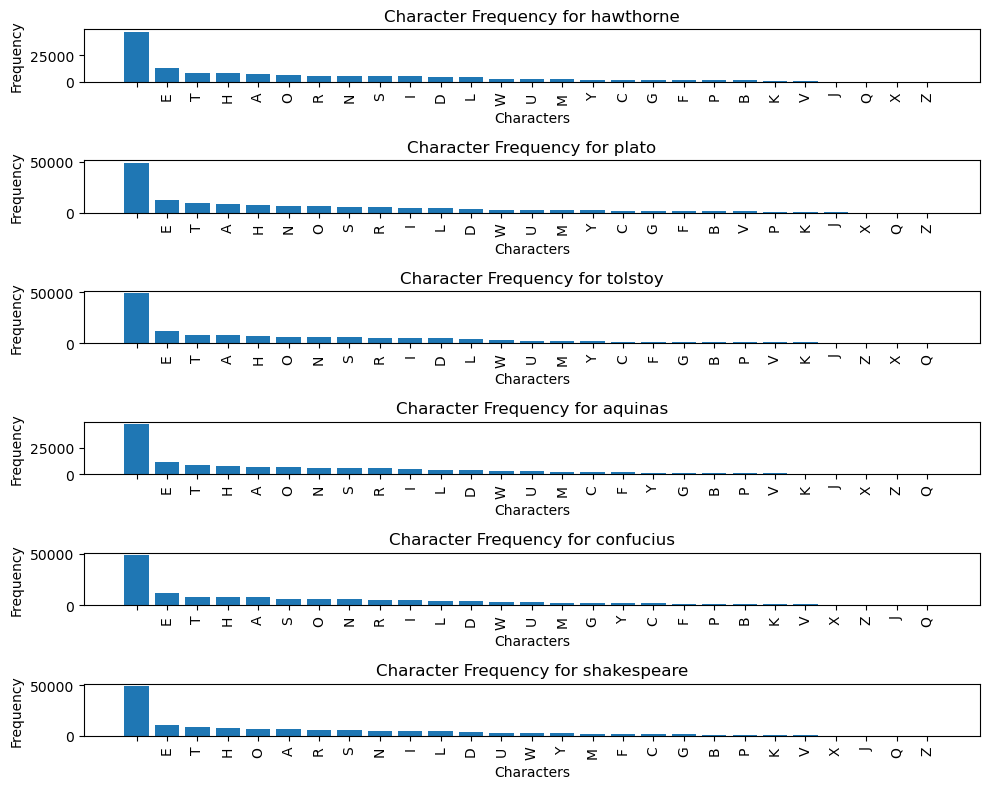

In [14]:
char_freq(glutenburg_train)

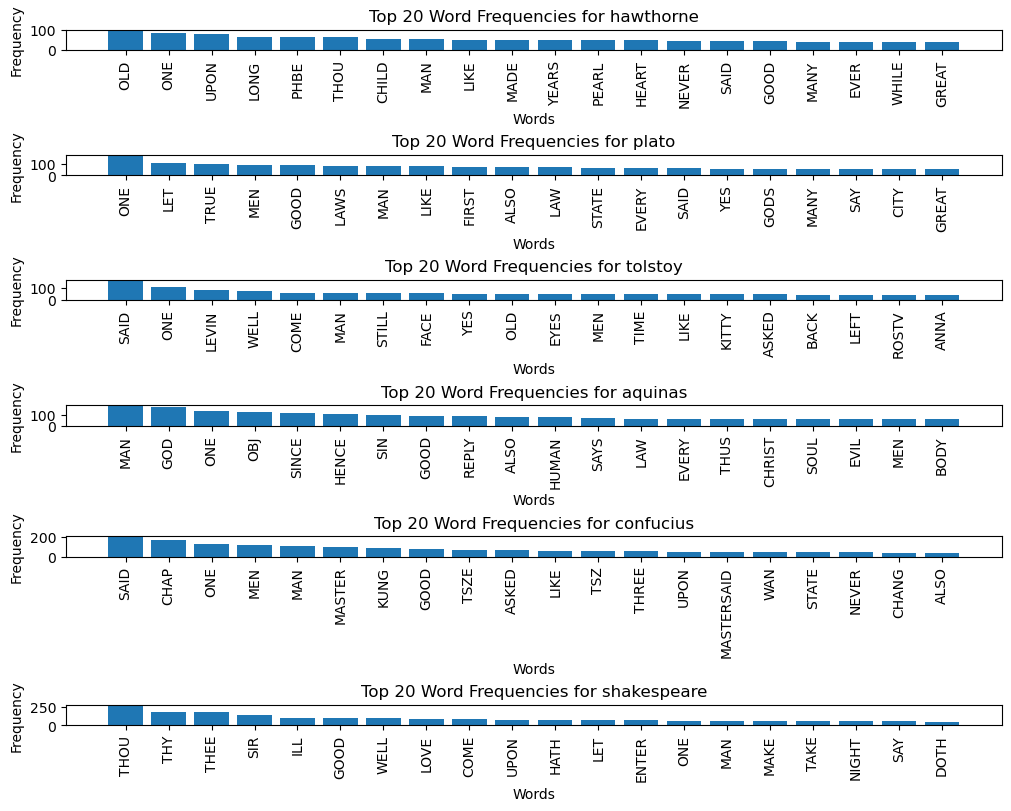

In [15]:
word_freq_w(glutenburg_train, 20)

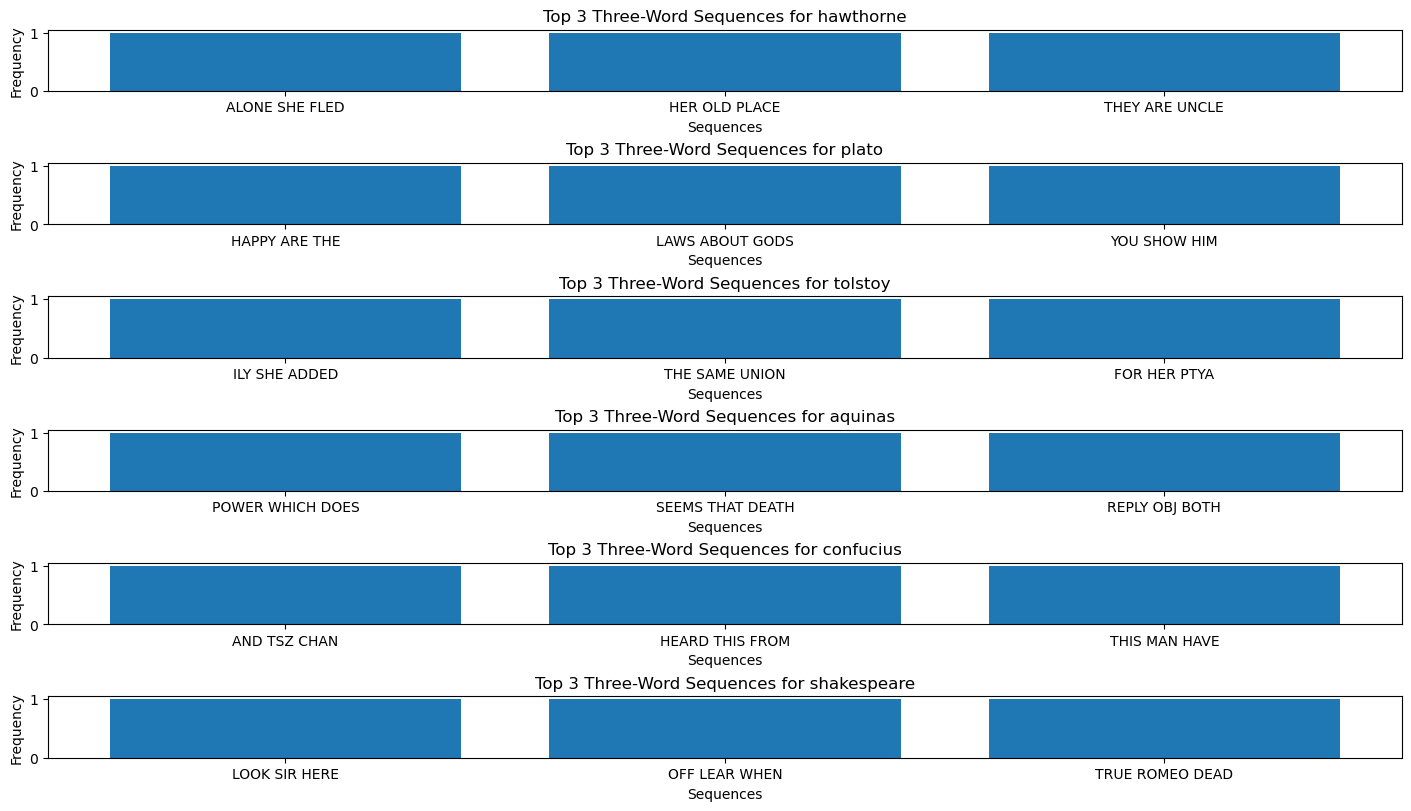

{}


In [16]:
seq_freq(glutenburg_train, 3)

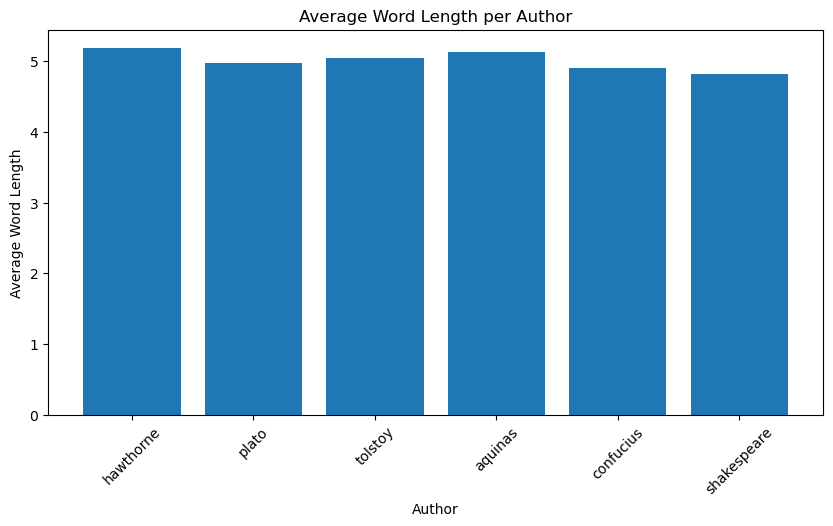

In [17]:
avg_word_len(glutenburg_train)

## Creating Train Test Data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(train_df["Text"],train_df["Label"], test_size = 0.2, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(36000, 53902) (9000, 53902) (36000,) (9000,)


## Model Building, Training and Evaluation

### Logistic Regression

In [19]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.5108888888888888
              precision    recall  f1-score   support

     aquinas       0.55      0.57      0.56      1453
   confucius       0.52      0.49      0.50      1537
   hawthorne       0.48      0.46      0.47      1540
       plato       0.45      0.54      0.49      1511
 shakespeare       0.58      0.52      0.55      1498
     tolstoy       0.51      0.48      0.50      1461

    accuracy                           0.51      9000
   macro avg       0.51      0.51      0.51      9000
weighted avg       0.51      0.51      0.51      9000



#### Making Prediction with Logistic Regression

In [20]:
test_senteces = x_test.to_list()
test_senteces[0]

'FINE  FELLOWTHERES'

In [21]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['plato']


### Support Vector Machine

In [22]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

s:\Anaconda\envs\ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.5161111111111111
              precision    recall  f1-score   support

     aquinas       0.54      0.56      0.55      1453
   confucius       0.58      0.50      0.54      1537
   hawthorne       0.50      0.47      0.49      1540
       plato       0.42      0.55      0.48      1511
 shakespeare       0.59      0.53      0.56      1498
     tolstoy       0.51      0.47      0.49      1461

    accuracy                           0.52      9000
   macro avg       0.52      0.52      0.52      9000
weighted avg       0.52      0.52      0.52      9000



#### Making Prediction with SVM

In [23]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['plato']


### Naive Bayes (Multinomial)

In [24]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.5098888888888888
              precision    recall  f1-score   support

     aquinas       0.55      0.58      0.57      1453
   confucius       0.53      0.48      0.50      1537
   hawthorne       0.53      0.43      0.47      1540
       plato       0.42      0.57      0.48      1511
 shakespeare       0.58      0.52      0.55      1498
     tolstoy       0.50      0.48      0.49      1461

    accuracy                           0.51      9000
   macro avg       0.52      0.51      0.51      9000
weighted avg       0.52      0.51      0.51      9000



#### Making Predictions with Naive Bayes

In [25]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['shakespeare']


### Random Forest Classifier

In [26]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.38822222222222225
              precision    recall  f1-score   support

     aquinas       0.44      0.47      0.46      1453
   confucius       0.37      0.33      0.35      1537
   hawthorne       0.41      0.24      0.30      1540
       plato       0.35      0.48      0.40      1511
 shakespeare       0.37      0.47      0.42      1498
     tolstoy       0.42      0.34      0.38      1461

    accuracy                           0.39      9000
   macro avg       0.39      0.39      0.38      9000
weighted avg       0.39      0.39      0.38      9000



#### Making Predictions with Random Forest

In [27]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['shakespeare']


### Ensemble Classifier

In [28]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4]) 
ec.fit(x_train_tfidf,y_train)                                                 
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

#### Making Predictions with Ensemble Classifier

In [ ]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['plato']


### Compare between ML models

In [ ]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],

})

In [ ]:
print ('Comparison using uni-bi-gram(1,2)') 
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,Ensembled
Accuracy,51.088889,51.611111,50.988889,38.822222,50.100000
F1_score,51.155381,51.755910,51.065471,38.387959,50.152368
Recall,51.088889,51.611111,50.988889,38.822222,50.100000
Precision,51.088889,51.611111,50.988889,38.822222,50.100000


## Loading Gutenberg Dataset 2

In [ ]:
book_list = os.listdir("../dataset_02_personally_collected_data/data_before_processing")
book_list

In [ ]:

import os
import re
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

In [ ]:
def extract_author(filename):
    """
    Extract the author's name from the filename.
    Assumes filename format is 'name-of-author_book-name.txt'
    """
    return filename.split('_')[0].replace('-', ' ')

def process_files(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            author = extract_author(filename)
            path = os.path.join(directory, filename)
            with open(path, 'r', encoding='utf-8') as file:
                text = file.read()
                sentences = sent_tokenize(text)
                if len(sentences) > 1000:
                    sampled_sentences = sentences[:1000]
                else:
                    sampled_sentences = sentences
                for sentence in sampled_sentences:
                    data.append({'Text': sentence, 'Label': author})
    return data

def create_dataframe(data):
    """
    Create a dataframe from the provided data list
    """
    return pd.DataFrame(data)

# Change 'your-directory-path' to the path of the directory containing your txt files
directory_path = '../dataset_02_personally_collected_data/data_before_processing'
data = process_files(directory_path)
df = create_dataframe(data)
print(df.head())

In [ ]:
df=pd.read_csv("../dataset_02_personally_collected_data\data_after_processing/books_df.csv", engine='python', encoding='UTF-8')
df['Label'].value_counts()

## EDA of Gutenburg Dataset 2 (Before Preprocessing)

In [ ]:
char_freq(df), word_freq_w(df),avg_word_len(df),seq_freq(df)

In [ ]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.countplot(x=df["Label"])

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

### Preprocessing Gutenberg Dataset 2

In [ ]:
df['Label'].value_counts()

In [ ]:
# Determine the minimum count to downsample to
min_count = df['Label'].value_counts().min()

# Downsample each group
df = df.groupby('Label').sample(n=min_count, random_state=42)
df["Label"].value_counts()

In [ ]:
## data cleaning
df['Text']=df['Text'].fillna("") 
df.isna().sum()

In [ ]:
import nltk
from nltk.corpus import stopwords, reuters, brown, gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from textblob import Word 
from wordcloud import WordCloud

In [ ]:
df['lower_case'] = df['Text'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)  

stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')

df['short_word'] = df['stop_words'].str.findall('\w{2,}')
df['string']=df['short_word'].str.join(' ') 
 
df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

### EDA Gutenburg Dataset 2 (After Preprocessing)

In [ ]:
char_freq(df), word_freq_w(df),avg_word_len(df),seq_freq(df)

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Label"])

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

## Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["Label"], test_size = 0.2, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

### Model Building, Training, Evaluation and Comparison (for Gutenberg Dataset 2)

### Logistic Regression

#### Model Building and Training

In [ ]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

#### Making Predictions

In [ ]:
test_senteces = x_test.to_list()
test_senteces[0]

In [ ]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

#### Cross Validation

In [ ]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=10)  
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

### Support Vector Machine

#### Model Building and Training

In [ ]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

#### Making Predictions

In [ ]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

#### Cross Validations

In [ ]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=10)   
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

### Naive Bayes (Multinomial)

#### Model Building and training

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

#### Making Predictions

In [ ]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

#### Cross Validaiton

In [ ]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)   
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

### Random Forest Classifier

#### Model Building and Training

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

#### Making Predictions

In [ ]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

#### Cross Validations

In [ ]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=10)   
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

### Ensemble Classifier

#### Model Building and Training

In [ ]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4]) 
ec.fit(x_train_tfidf,y_train)                                                 
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

#### Making Predictions

In [ ]:
mc = count_vect.transform([random.choice(test_senteces)])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

#### Cross Validation

In [ ]:
scores = cross_val_score(ec, x_train_tfidf,y_train, cv=10)  
print(accuracy_score(y_test,y_pred6))
print ("Cross-validated scores:", scores)

### Comparison Between ML Models (Gutenberg Dataset 2)

In [ ]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],

})

In [ ]:
print ('Comparison using uni-bi-gram(1,2)') 
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()